# Absolute and relative cavity entry phases

## Preparation

### Load libraries

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

import config_manager
from beam_calculation.beam_calculator import BeamCalculator
from beam_calculation.factory import BeamCalculatorsFactory
from beam_calculation.simulation_output.simulation_output import SimulationOutput
from core.accelerator.accelerator import Accelerator
from core.accelerator.factory import NoFault, WithFaults
from failures.fault_scenario import FaultScenario, fault_scenario_factory
from visualization import plot

plt.rcParams["figure.figsize"] = (15, 5)

### Set configuration dicts

In [2]:
LW_DIR = Path("..", "..", "..", "..").absolute().resolve()
DATA_DIR = LW_DIR / "data" / "example"
OUT_DIR = DATA_DIR / "results"
CONFIG_PATH = DATA_DIR / "lightwin.toml"
CONFIG_KEYS = {
    'files': 'files',
    'beam_calculator': 'generic_envelope1d',
    'beam': 'beam',
    'plots': 'plots_minimal',
    'wtf': 'generic_wtf',
    'design_space': 'generic_design_space',
}

config_abs = config_manager.process_config(CONFIG_PATH, CONFIG_KEYS)
assert config_abs['beam_calculator']['flag_phi_abs']

[INFO    ] [files.py            ] Setting project_path = PosixPath('/home/placais/LightWin/data/example/results_tests')
Setting log_file = PosixPath('/home/placais/LightWin/data/example/results_tests/lightwin.log')
[INFO    ] [config_manager.py   ] Config dict files successfully tested. After potential  modifications, it looks like:
                                            dat_file = /home/placais/LightWin/data/example/example.dat
                                      project_folder = /home/placais/LightWin/data/example/results_tests
[INFO    ] [config_manager.py   ] Config dict beam_calculator successfully tested. After potential  modifications, it looks like:
                                                tool = Envelope1D
                                        flag_phi_abs = True
                                         flag_cython = True
                                    n_steps_per_cell = 40
                                              method = RK
[INFO    ] [config_manage

In [3]:
override = {'beam_calculator': {'flag_phi_abs': False}}
config_rel = config_manager.process_config(CONFIG_PATH, CONFIG_KEYS, warn_mismatch=True, override=override)

[INFO    ] [files.py            ] Setting project_path = PosixPath('/home/placais/LightWin/data/example/results_tests')
Setting log_file = PosixPath('/home/placais/LightWin/data/example/results_tests/lightwin.log')
[INFO    ] [config_manager.py   ] Config dict files successfully tested. After potential  modifications, it looks like:
                                            dat_file = /home/placais/LightWin/data/example/example.dat
                                      project_folder = /home/placais/LightWin/data/example/results_tests
[INFO    ] [config_manager.py   ] Config dict beam_calculator successfully tested. After potential  modifications, it looks like:
                                                tool = Envelope1D
                                        flag_phi_abs = False
                                         flag_cython = True
                                    n_steps_per_cell = 40
                                              method = RK
[INFO    ] [config_manag

### Set BeamCalculator objects

In [4]:
factory = BeamCalculatorsFactory(beam_calculator=config_abs['beam_calculator'],
                                 files=config_abs['files'])
solver_abs = factory.run_all()[0]

factory = BeamCalculatorsFactory(beam_calculator=config_rel['beam_calculator'],
                                 files=config_rel['files'])
solver_rel = factory.run_all()[0]

### Set Accelerator objects

In [5]:
factory = WithFaults(beam_calculators=solver_abs, **config_abs['files'], **config_abs['wtf'])
accelerators_abs = factory.run_all()
for acc in accelerators_abs:
    acc.name += r' (absolute $\phi_0$)'
working_abs = accelerators_abs[0]
broken_abs = accelerators_abs[1]

factory = WithFaults(beam_calculators=solver_rel, **config_rel['files'], **config_rel['wtf'])
accelerators_rel = factory.run_all()
for acc in accelerators_rel:
    acc.name += r' (relative $\phi_0$)'
working_rel = accelerators_rel[0]
broken_rel = accelerators_rel[1]

working = (working_abs, working_rel)
broken = (broken_abs, broken_rel)

[INFO    ] [factory.py          ] First initialisation of ListOfElements, ecompassing all linac. Created with dat_file = PosixPath('/home/placais/LightWin/data/example/example.dat')
[INFO    ] [list_of_elements.py ] Successfully created a ListOfElements with self.w_kin_in = 20.0 MeV and self.phi_abs_in = 0.0 rad.
[INFO    ] [factory.py          ] First initialisation of ListOfElements, ecompassing all linac. Created with dat_file = PosixPath('/home/placais/LightWin/data/example/example.dat')
[INFO    ] [list_of_elements.py ] Successfully created a ListOfElements with self.w_kin_in = 20.0 MeV and self.phi_abs_in = 0.0 rad.
[INFO    ] [factory.py          ] First initialisation of ListOfElements, ecompassing all linac. Created with dat_file = PosixPath('/home/placais/LightWin/data/example/example.dat')
[INFO    ] [list_of_elements.py ] Successfully created a ListOfElements with self.w_kin_in = 20.0 MeV and self.phi_abs_in = 0.0 rad.
[INFO    ] [factory.py          ] First initialisation 

## Propagate the beam

### Nominal linac

[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000000_ref/0_Envelope1D/example.dat.
[INFO    ] [beam_calculator.py  ] Elapsed time in beam calculation: 0:00:00.478064
[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000000_ref/0_Envelope1D/example.dat.
[INFO    ] [beam_calculator.py  ] Elapsed time in beam calculation: 0:00:00.464182


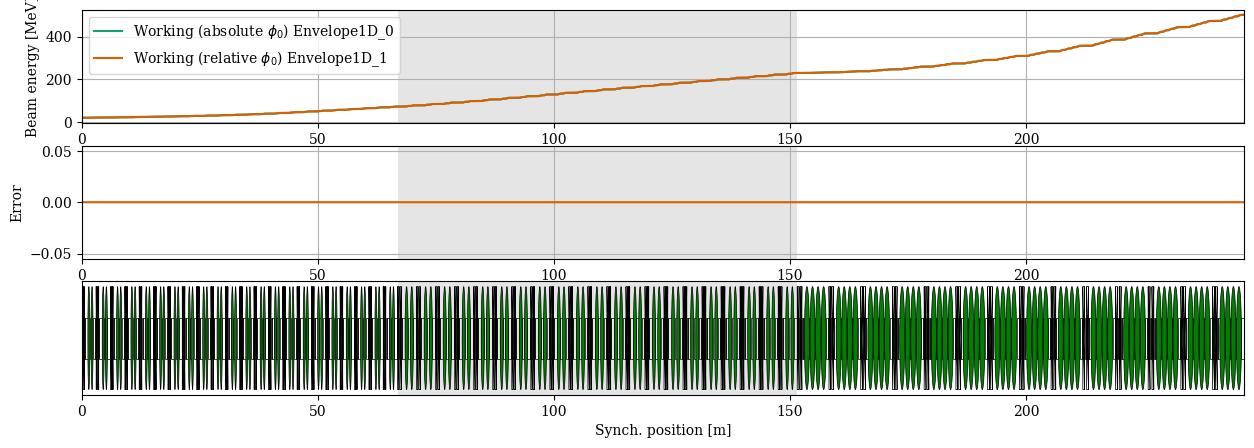

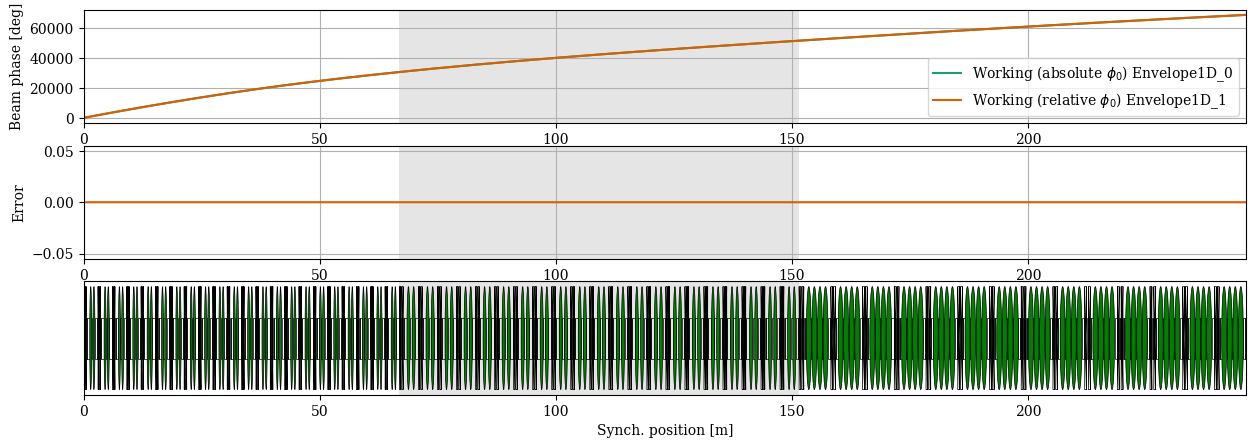

In [6]:
_ = solver_abs.compute(working_abs)
_ = solver_rel.compute(working_rel)
figs = plot.factory(working, config_abs['plots'], save_fig=False, clean_fig=False)

<div class="alert alert-info">
When there is no cavity failure, the relative and absolute definition of the $\phi_0$ are absolutely equivalent.
</div>

## Linac with one broken cavity

In [7]:
fault_scenarios_abs = fault_scenario_factory(accelerators_abs, solver_abs, config_abs['wtf'], config_abs['design_space'])
fault_scenarios_rel = fault_scenario_factory(accelerators_rel, solver_rel, config_rel['wtf'], config_rel['design_space'])
fault_scenarios = fault_scenarios_abs + fault_scenarios_rel

[INFO    ] [factory.py          ] Created variables:
Variable                  | Element         | x_0      | Lower lim | Upper lim
----------------------------------------------------------------------------------------------------
$\phi_{0, abs}$ [deg]     | ELT9            |  272.279 |  -360.000 |   360.000
$\phi_{0, abs}$ [deg]     | ELT10           |   55.649 |  -360.000 |   360.000
$\phi_{0, abs}$ [deg]     | ELT12           |  101.288 |  -360.000 |   360.000
$k_e$ [1]                 | ELT9            |    1.649 |     1.319 |     4.756
$k_e$ [1]                 | ELT10           |    1.649 |     1.319 |     4.756
$k_e$ [1]                 | ELT12           |    1.698 |     1.359 |     4.756
Created constraints:

Constraint                | Element         | x_0      | Lower lim | Upper lim
----------------------------------------------------------------------------------------------------
[INFO    ] [factory.py          ] Created objectives:
                        What, where, 

[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000001/0_Envelope1D/example.dat.
[INFO    ] [beam_calculator.py  ] Elapsed time in beam calculation: 0:00:00.513474
[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000001/0_Envelope1D/example.dat.
[INFO    ] [beam_calculator.py  ] Elapsed time in beam calculation: 0:00:00.602998


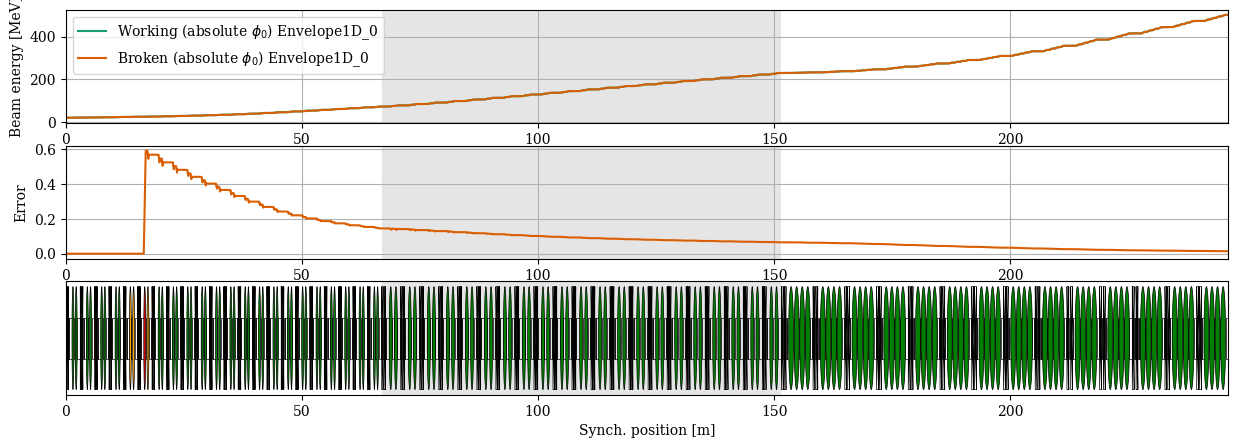

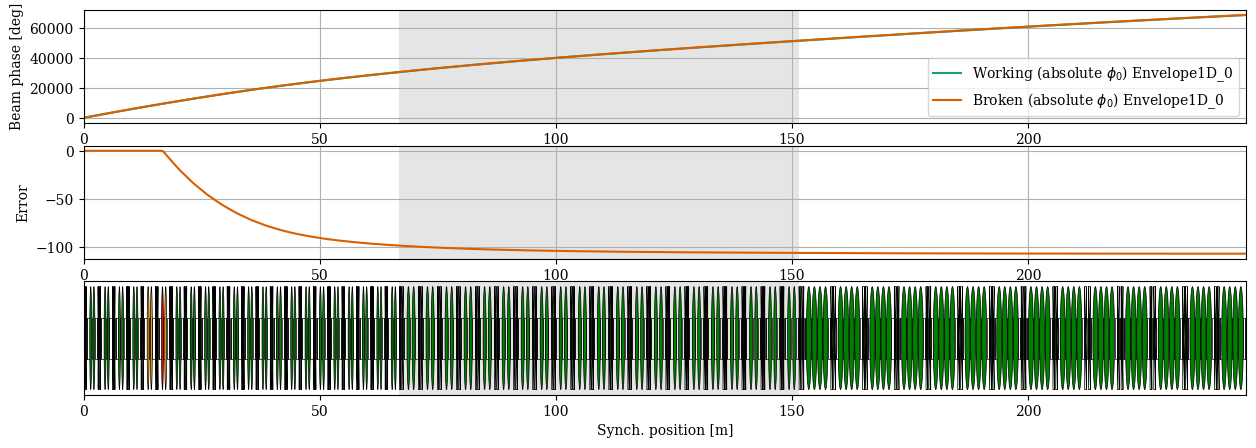

In [8]:
_ = solver_abs.compute(broken_abs)
_ = solver_rel.compute(broken_rel)
figs = plot.factory(accelerators_abs, config_abs['plots'], save_fig=False, clean_fig=False)

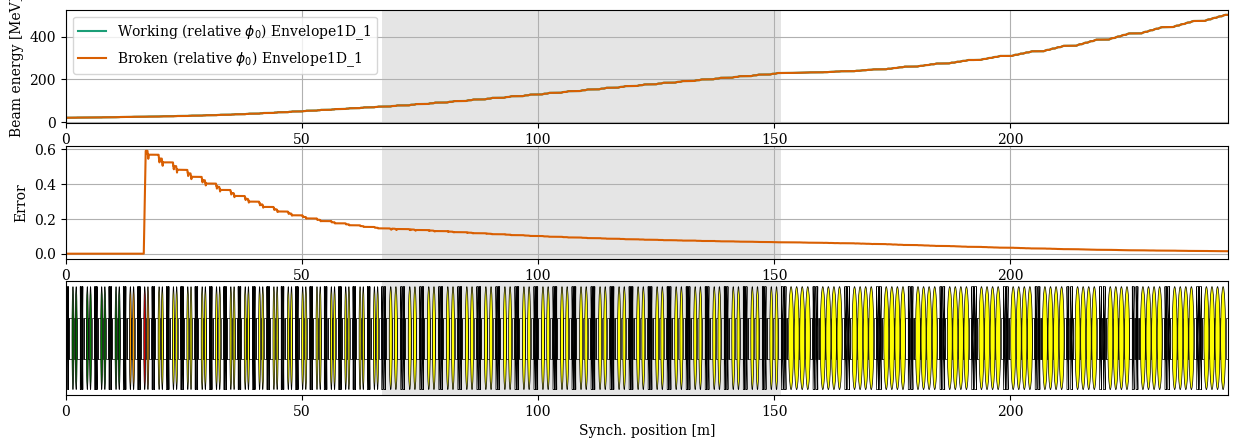

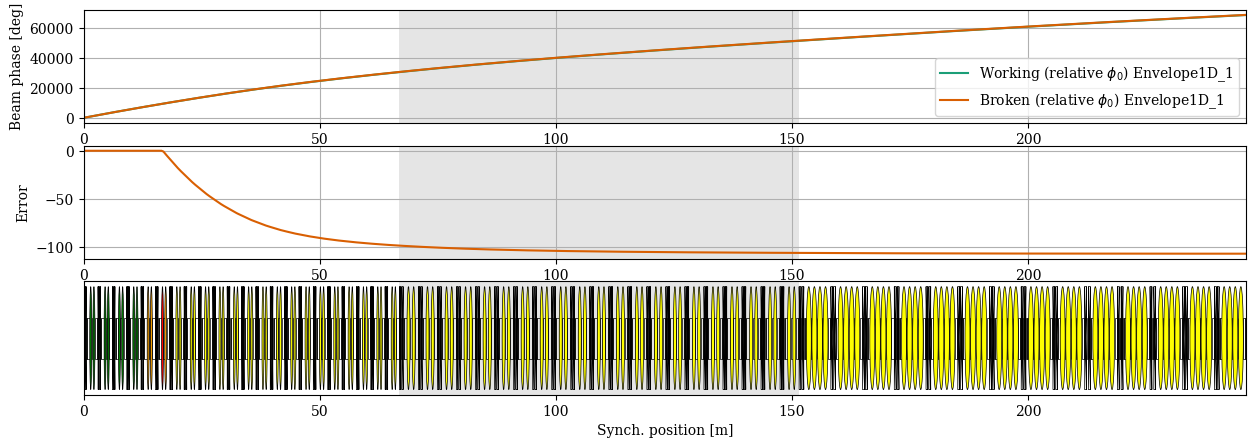

In [9]:
figs = plot.factory(accelerators_rel, config_rel['plots'], save_fig=False, clean_fig=False)